# Chapter 7 - Programming with Qiskit

In [30]:
# Load helper file
%run helper_file_1.0.ipynb

qc = QuantumCircuit(2,2)

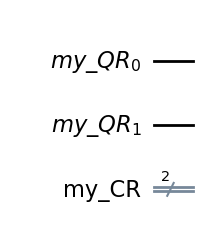

In [31]:
# Import registers
from qiskit import QuantumRegister, ClassicalRegister

qr = QuantumRegister(2, 'my_QR')
cr = ClassicalRegister(2, 'my_CR')
qc = QuantumCircuit(qr,cr)
qc.draw(output='mpl')


In [32]:
qc = QuantumCircuit(QuantumRegister(2, 'my_QR'), ClassicalRegister(2, 'my_CR'))

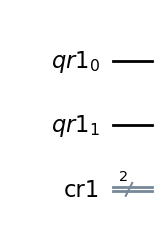

In [33]:
#Create the quantum and classical registers, each with labels
qr1 = QuantumRegister(2, name='qr1')
cr1 = ClassicalRegister(2, name='cr1')
#Create the quantum circuit using the registers
qc1 = QuantumCircuit(qr1, cr1)
#Draw the circuit
qc1.draw(output='mpl')


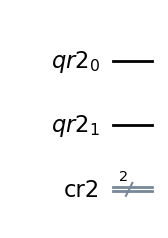

In [34]:
#Create two Quantum and Classical registers
qr2 = QuantumRegister(2, name='qr2')
cr2 = ClassicalRegister(2, name='cr2')
#Create a second circuit using the registers created above
qc2 = QuantumCircuit(qr2, cr2)
#Draw the second quantum circuit
qc2.draw(output='mpl')


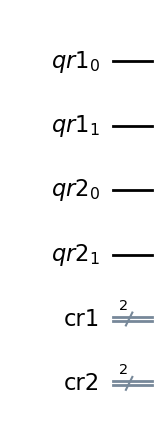

In [35]:
#Concatenate the two previous circuits to create a new circuit
#Create an empty quantum circuit
qc_combined = QuantumCircuit()
#Add the two previous quantum and classical registers to the empty quantum circuit
qc_combined.add_register(qr1, qr2, cr1, cr2)
#Draw the concatenated circuit
qc_combined.draw(output='mpl')


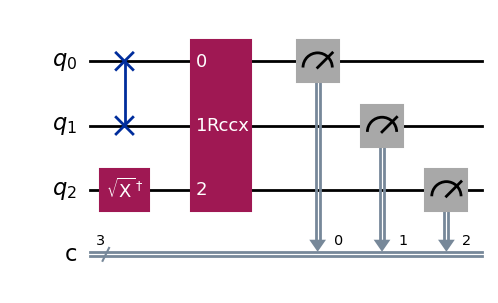

In [36]:
#Import the random_circuit class
from qiskit.circuit.random import random_circuit
#Construct the random circuit with the number of qubits = 3
#with a depth = 2, and include the measurement operator for each qubit
qc = random_circuit(3, 2, measure=True)
#Draw the circuit
qc.draw(output='mpl')


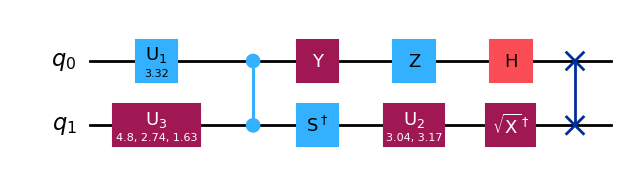

In [37]:
# Import the random circuit class
from qiskit.circuit.random import random_circuit
#Create two random circuits, each with 2 qubit registers and random #gate operator counts.
qc1 = random_circuit(2,2)
qc2 = random_circuit(2,4)
#Concatenate the two random circuits
qc = qc1.compose(qc2, [0,1])
#Draw the circuit
qc.draw(output='mpl')


In [38]:
#Define function to print circuit properties:
def print_circuit_props(qc):
    width = qc.width()
    depth = qc.depth()
    num_operators = qc.count_ops()
    circuit_size = qc.size()
    print('Width = ', width) 
    print('Depth = ', depth)
    print('Circuit size = ', circuit_size)
    print('Number of operators = ', num_operators)


In [39]:
#Pass our quantum circuit to print out the circuit properties
print_circuit_props(qc)


Width =  2
Depth =  6
Circuit size =  10
Number of operators =  OrderedDict([('u1', 1), ('u3', 1), ('cz', 1), ('sdg', 1), ('y', 1), ('z', 1), ('u2', 1), ('sxdg', 1), ('h', 1), ('swap', 1)])


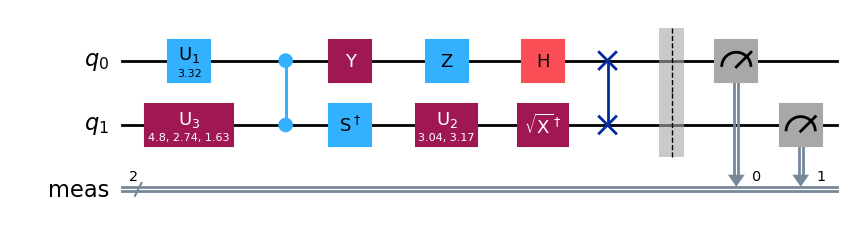

In [40]:
#Use measure_all() to automatically add the barrier, measurement, and #classical register to our existing circuit.
qc.measure_all()
#Draw the circuit
qc.draw(output='mpl')


In [41]:
#Print out the circuit properties
print_circuit_props(qc)

Width =  4
Depth =  7
Circuit size =  12
Number of operators =  OrderedDict([('measure', 2), ('u1', 1), ('u3', 1), ('cz', 1), ('sdg', 1), ('y', 1), ('z', 1), ('u2', 1), ('sxdg', 1), ('h', 1), ('swap', 1), ('barrier', 1)])


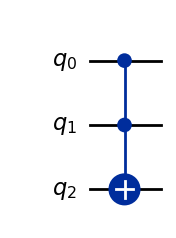

In [42]:
qc = QuantumCircuit(3)
qc.ccx(0,1,2)
qc.draw(output='mpl')


In [43]:
#Print out the circuit properties
print_circuit_props(qc)


Width =  3
Depth =  1
Circuit size =  1
Number of operators =  OrderedDict([('ccx', 1)])


Width =  3
Depth =  11
Circuit size =  15
Number of operators =  OrderedDict([('cx', 6), ('t', 4), ('tdg', 3), ('h', 2)])


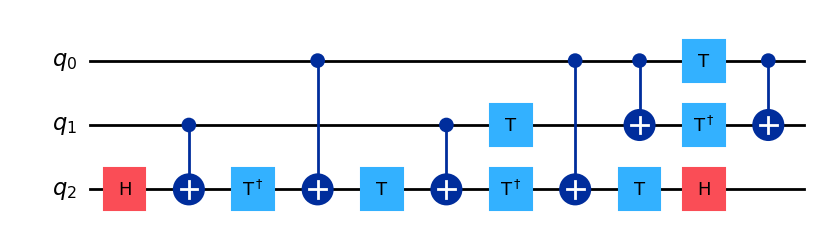

In [44]:
#Print out the circuit properties
print_circuit_props(qc.decompose())
qc.decompose().draw(output='mpl')

# Customization and Parameterization of circuits

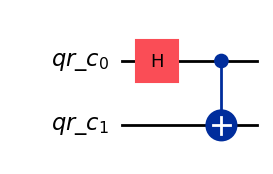

In [45]:
#Create a custom two-qubit composite gate
#Create the quantum register
qr = QuantumRegister(2, name='qr_c')
#Generate quantum circuit which will make up the composite gate
comp_qc = QuantumCircuit(qr, name='My-composite')
#Add any gates you wish to your composite gate
comp_qc.h(0)
comp_qc.cx(0, 1)
#Create the composite instructions by converting 
#the QuantumCircuit to a list of Instructions
composite_inst = comp_qc.to_instruction()
#Draw the circuit which will represent the composite gate
comp_qc.draw(output='mpl')


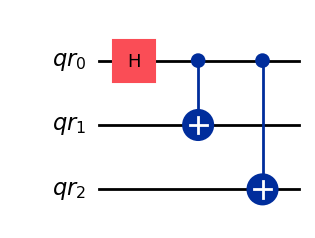

In [46]:
#Create your 2-qubit circuit to generate your composite gate
qr2 = QuantumRegister(3, 'qr')
#Create a quantum circuit using the quantum register
qc = QuantumCircuit(qr2)
#Add any arbitrary gates that would represent the function 
#of the composite gate 
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
#Draw the composite circuit
qc.draw(output='mpl')


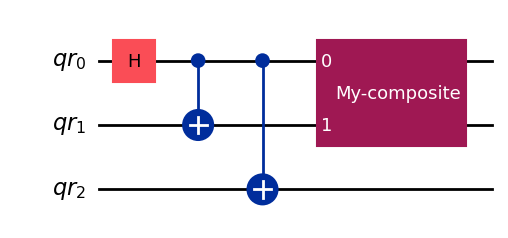

In [47]:
#Append your composite gate to the specified qubits. 
qc.append(composite_inst, [qr2[0], qr2[1]])
#Draw the complete circuit
qc.draw(output='mpl')


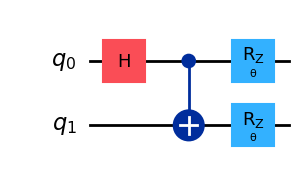

In [48]:
#Import the Parameter object
from qiskit.circuit import Parameter
#Construct the Parameter set to Theta
param_theta = Parameter('θ')
#Create a two-qubit quantum circuit and add some gates
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
#Include a rotation gate which we wish to apply 
#the Parameter value 
qc.rz(param_theta,0)
qc.rz(param_theta,1)
#Draw the circuit
qc.draw(output='mpl')


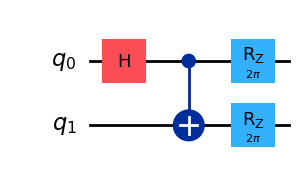

In [49]:
import numpy as np
#Bind the parameters with a value, in this case 2π
qc = qc.assign_parameters(parameters={param_theta: 2*np.pi})
#Draw the circuit with the set parameter values
qc.draw(output='mpl')


# Generating Pulse schedules on quantum hardware

In [50]:
#Import pulse classes
from qiskit.pulse import Waveform, DriveChannel, Play, Schedule


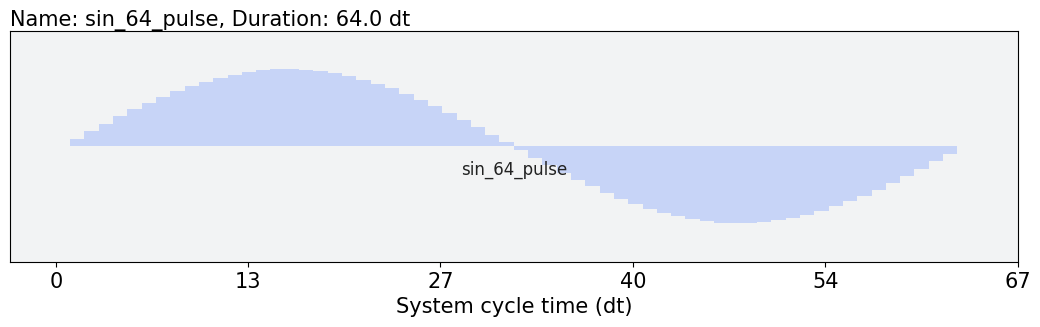

In [51]:
#Import numpy and generate the sin sample values
import numpy as np
x = np.linspace(0,2*np.pi,64)
data = np.sin(x)
#Generate our sample waveform 
waveform = Waveform(data, name="sin_64_pulse")
#Draw the generated sample waveform
waveform.draw()


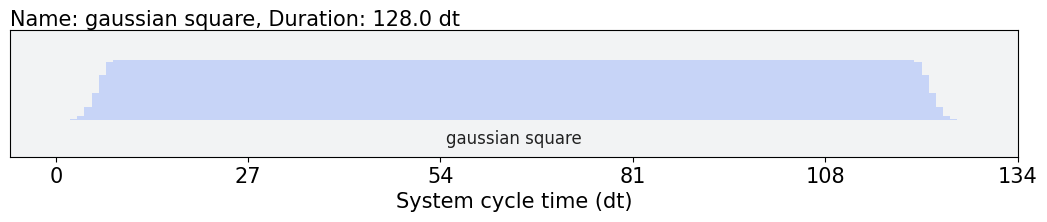

In [52]:
#Import the Gaussian Square pulse from Pulse Library
from qiskit.pulse.library import GaussianSquare
#Create a Gaussian Square pulse: 
#Args: duration, amp, sigma, width, name
gaussian_square_pulse = GaussianSquare(128,1,2,112, name="gaussian square")
gaussian_square_pulse.draw()


# Generating and executing Schedules

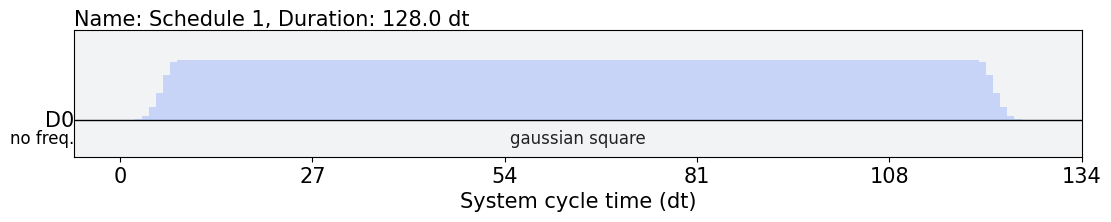

In [53]:
#Create the first schedule with our Gaussian Square pulse
schedule_1 = Schedule(name='Schedule 1')
schedule_1 = schedule_1.insert(0, Play(gaussian_square_pulse, DriveChannel(0)))
#Draw the schedule
schedule_1.draw()


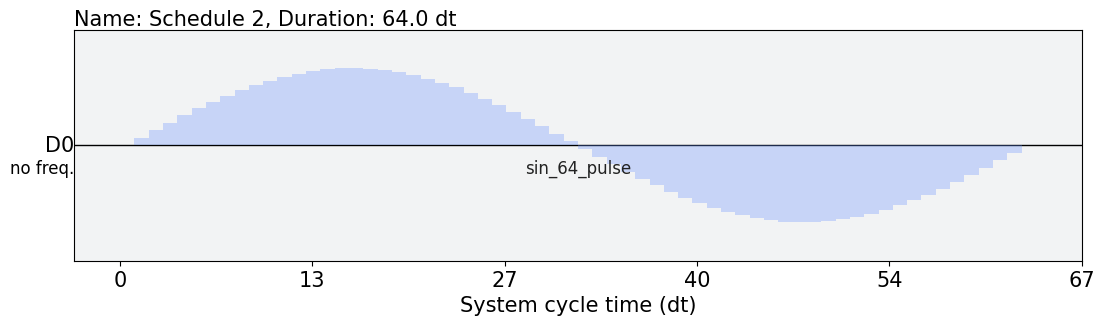

In [54]:
#Create a second schedule with our sample waveform
schedule_2 = Schedule(name='Schedule 2')
schedule_2 = schedule_2.insert(0, Play(waveform, DriveChannel(0)))
#Draw the schedule
schedule_2.draw()


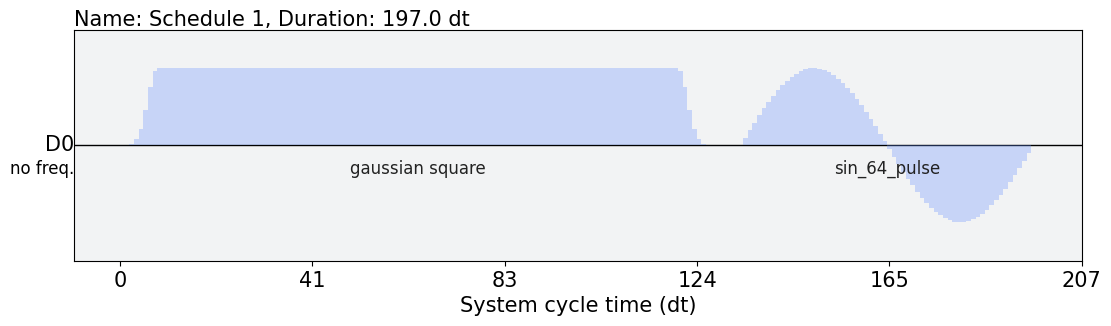

In [55]:
#Let's create a third schedule 
#Where we add the first schedule and second schedules
#And shift the second to the right by a time of 5 after the first
schedule_3 = schedule_1.insert(schedule_1.duration+5, schedule_2)
schedule_3.draw()


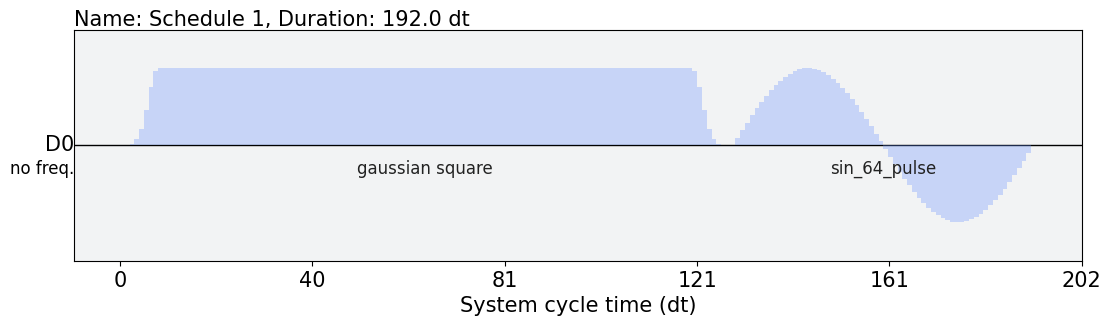

In [56]:
#We could have also combined the two using the append operator
#The two schedules are appended immediately after one another
schedule_3_append = schedule_1.append(schedule_2)
schedule_3_append.draw()


# Understanding the Job component

In [63]:
# Run the simple quantum circuit on local Sampler 
from qiskit.primitives import Sampler
sampler = Sampler() 

# Create a simple circuit
qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure([0],[0])

# Run the qc circuit
job = sampler.run(qc, shots=1024)
print(job.status())

JobStatus.RUNNING


In [64]:
#From the previous output of executed jobs, obtain the job id 
#and print out information about the Job.
print('Print Job ID: ', job.job_id())
print('Print Job Status: ', job.status())
print('Print Job Result: ', job.result())

Print Job ID:  5b3cb805-ae68-485c-8064-d7601c24c662
Print Job Status:  JobStatus.DONE
Print Job Result:  SamplerResult(quasi_dists=[{0: 0.484375, 1: 0.515625}], metadata=[{'shots': 1024}])


{'0': 0.484375, '1': 0.515625}


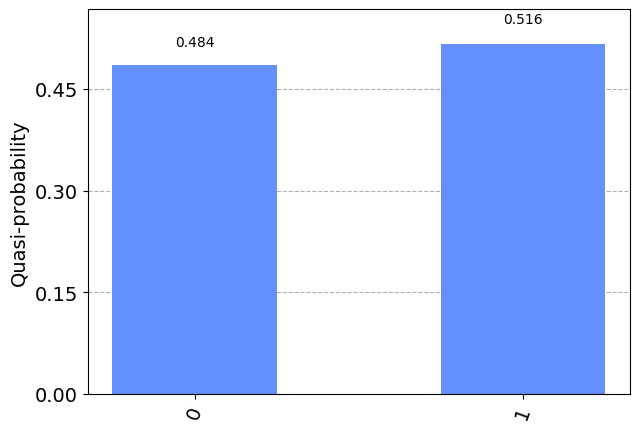

In [67]:
job_result = job.result()

quasi_dists = job_result.quasi_dists

#Get the result counts 
counts = quasi_dists[0].binary_probabilities()

print(counts)
plot_distribution(counts)
